In [66]:
%matplotlib inline

# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

set_save = False

In [94]:
# Change the input file names here!
input_filename = "./input/pre-proc/100true100false.txt"

data = np.loadtxt(input_filename, dtype=float, delimiter=",")

In [95]:
df_labels = 'CenterPixel', \
    'xyImgSliceMean','xyFFTSliceMean','xyCntOverThres', \
    'xzImgSliceMean','xzFFTSliceMean','xzCntOverThres', \
    'yzImgSliceMean','yzFFTSliceMean','yzCntOverThres', \
    'label'
    
df = pd.DataFrame(data, columns=df_labels)

In [96]:
df.head()

,CenterPixel,xyImgSliceMean,xyFFTSliceMean,xyCntOverThres,xzImgSliceMean,xzFFTSliceMean,xzCntOverThres,yzImgSliceMean,yzFFTSliceMean,yzCntOverThres,label
0,135.0,47.388,147.687,47.0,20.347,108.225,6.0,47.796,123.144,39.0,1.0
1,22.0,42.429,144.803,60.0,35.694,108.569,15.0,39.939,118.006,40.0,1.0
2,3.0,40.653,145.021,45.0,48.286,119.094,20.0,42.347,121.545,14.0,1.0
3,72.0,27.735,138.852,44.0,28.980,106.735,13.0,19.061,102.023,8.0,1.0
4,56.0,32.694,145.814,44.0,25.612,127.217,13.0,18.204,115.626,7.0,1.0


In [97]:
df.columns

Index(['CenterPixel', 'xyImgSliceMean', 'xyFFTSliceMean', 'xyCntOverThres',
       'xzImgSliceMean', 'xzFFTSliceMean', 'xzCntOverThres', 'yzImgSliceMean',
       'yzFFTSliceMean', 'yzCntOverThres', 'label'],
      dtype='object')

In [98]:
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['CenterPixel', 'xyImgSliceMean', 'xyFFTSliceMean',
       'xzImgSliceMean', 'xzFFTSliceMean', 'yzImgSliceMean',
       'yzFFTSliceMean']

df_scaled = df.copy()

#scaler = MinMaxScaler()
#df_scaled[cols_to_scale] = scaler.fit_transform(df_scaled[cols_to_scale])
df_scaled[cols_to_scale] = df_scaled[cols_to_scale].apply(lambda x: x/256)

df_scaled[['xyCntOverThres']] = df_scaled[['xyCntOverThres']].apply(lambda x: x/(21*21))
df_scaled[['xzCntOverThres','yzCntOverThres']] = df_scaled[['xzCntOverThres','yzCntOverThres']].apply(lambda x: x/(21*7))


#df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_scaled.head()

#dfTest[['A', 'B']] = scaler.fit_transform(dfTest[['A', 'B']])

,CenterPixel,xyImgSliceMean,xyFFTSliceMean,xyCntOverThres,xzImgSliceMean,xzFFTSliceMean,xzCntOverThres,yzImgSliceMean,yzFFTSliceMean,yzCntOverThres,label
0,0.527344,0.185109,0.576902,0.106576,0.079480,0.422754,0.040816,0.186703,0.481031,0.265306,1.0
1,0.085938,0.165738,0.565637,0.136054,0.139430,0.424098,0.102041,0.156012,0.460961,0.272109,1.0
2,0.011719,0.158801,0.566488,0.102041,0.188617,0.465211,0.136054,0.165418,0.474785,0.095238,1.0
3,0.281250,0.108340,0.542391,0.099773,0.113203,0.416934,0.088435,0.074457,0.398527,0.054422,1.0
4,0.218750,0.127711,0.569586,0.099773,0.100047,0.496941,0.088435,0.071109,0.451664,0.047619,1.0


/home/mapreduce/.conda/envs/local/lib/python3.5/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


img-output/feature-comp-CenterPixel.png
img-output/feature-comp-xyImgSliceMean.png
img-output/feature-comp-xyFFTSliceMean.png
img-output/feature-comp-xyCntOverThres.png


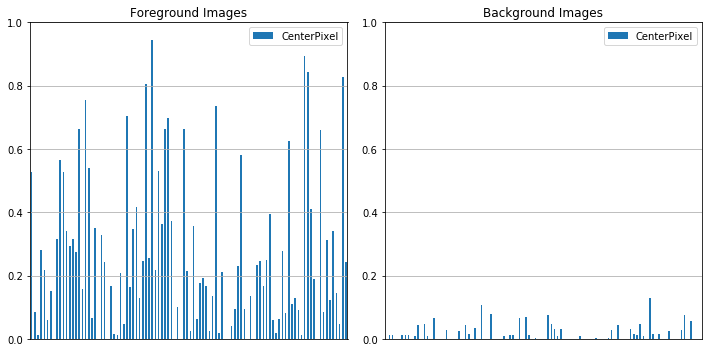

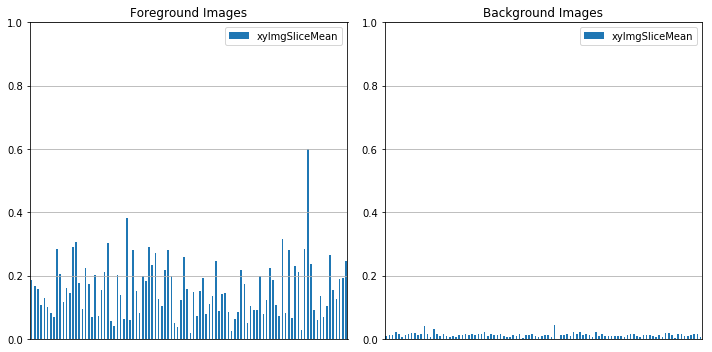

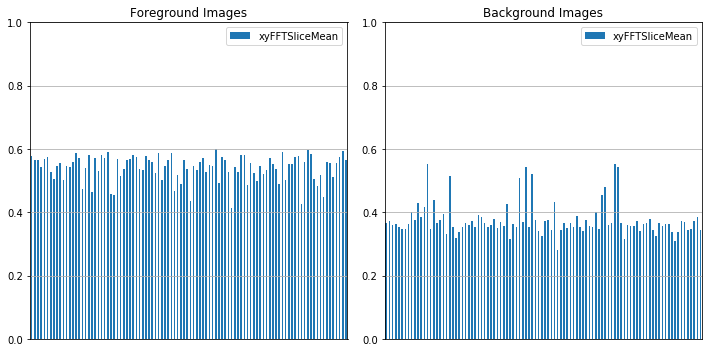

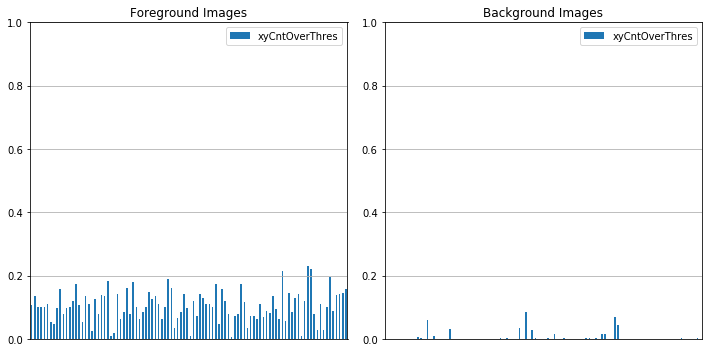

In [99]:


label_list = ['CenterPixel', 'xyImgSliceMean',  'xyFFTSliceMean',  'xyCntOverThres']

for label in label_list:

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

    df_scaled.loc[df_scaled['label'] == 1].plot(kind='bar', y=[label], ax=ax[0])

    df_scaled.loc[df_scaled['label'] == 0].plot(kind='bar', y=[label], ax=ax[1])
    ax[0].set_title("Foreground Images")
    ax[0].set_xticks([])
    ax[0].set_ylim([0,1])
    ax[0].grid()

    
    ax[1].set_title("Background Images")
    ax[1].set_xticks([])
    ax[1].set_ylim([0,1])
    ax[1].grid()
    
    #fig.suptitle('Main title')
    
    save_fig = set_save
    fig_format = 'png'
    fig_dpi =300

    plt.tight_layout()
    fig_name = 'img-output/feature-comp-{}.{}'.format(label,fig_format)
    print(fig_name)
    if(save_fig): 
        fig.savefig(fig_name, bbox_inches='tight', format=fig_format, dpi=fig_dpi)
        plt.close(fig)

In [100]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

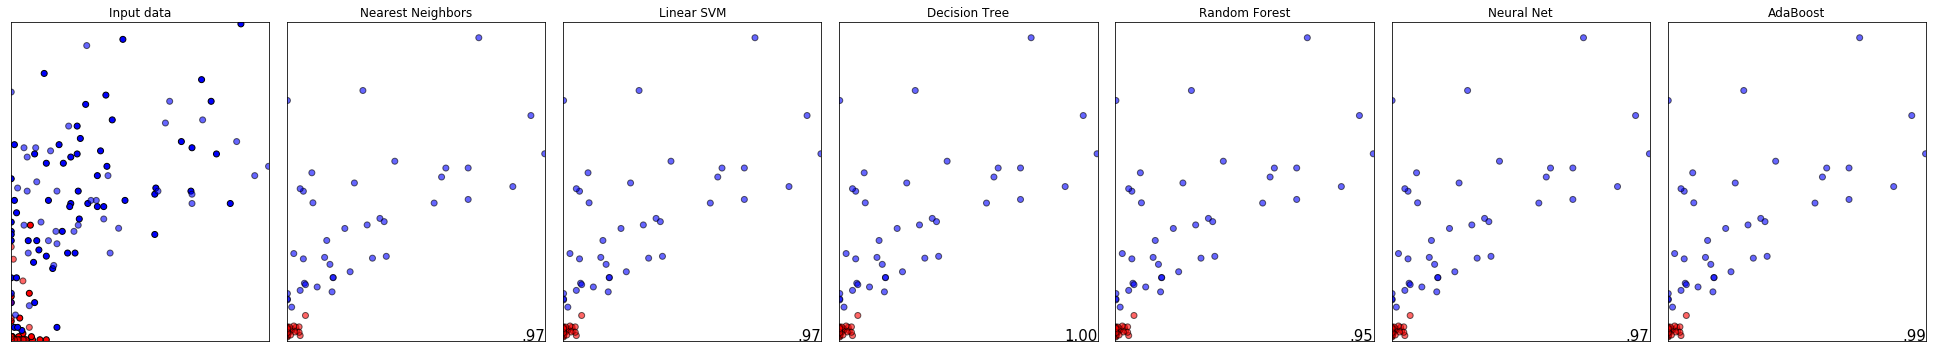

img-output/classification-on-balanced.png


<Figure size 432x288 with 0 Axes>

In [10]:
h = .02  # step size in the mesh

names = ["Nearest Neighbors", 
         "Linear SVM", 
         #"RBF SVM", 
         #"Gaussian Process",
         "Decision Tree",
         "Random Forest", 
         "Neural Net",
         "AdaBoost"
         #"Naive Bayes", 
         #"QDA"
        ]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    #SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier()
    #GaussianNB(),
    #QuadraticDiscriminantAnalysis()
    ]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0)]

figure = plt.figure(figsize=(27, 5))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X = data[:,:-1] # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
    y = data[:,-1]
    
    #X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 3].min() - .5, X[:, 3].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 3], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 3], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if (False):
            
            # Create mesh
            x_dim, y_dim = X.shape
            decision_mesh = None
            decision_mesh = np.c_[xx.ravel()]
            for counts in range(y_dim-1):
                # Ignore the other dimensions, by duplicatin the yy column
                decision_mesh = np.concatenate((decision_mesh, np.c_[yy.ravel()]), axis=1)
            
            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(decision_mesh)
            else:
                Z = clf.predict_proba(decision_mesh)[:, 1]

            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        #ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
        #           edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

save_fig = set_save
fig_format = 'png'
fig_dpi =300

plt.tight_layout()
fig_name = 'img-output/classification-on-balanced.{}'.format(fig_format)
print(fig_name)
if(save_fig): 
    figure.savefig(fig_name, bbox_inches='tight', format=fig_format, dpi=fig_dpi)
    plt.close(figure)

In [101]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report

def printCLassificationReport(y_true, y_pred, target_names=None):
    """Wrapper on the classification report"""
    print(classification_report(y_true, y_pred, target_names=target_names))



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



Decision Tree  5
Confusion matrix, without normalization
[[31  1]
 [ 2 26]]
Normalized confusion matrix
[[0.97 0.03]
 [0.07 0.93]]


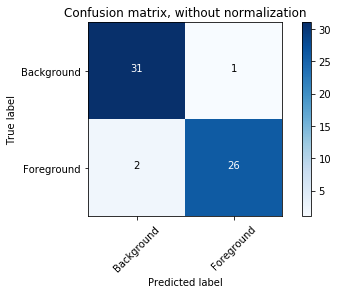

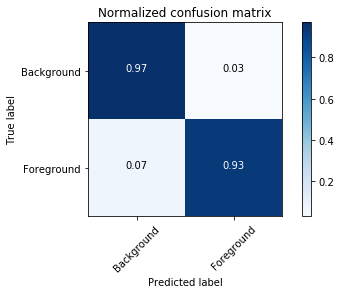

Decision Tree 2
Confusion matrix, without normalization
[[31  1]
 [ 3 25]]
Normalized confusion matrix
[[0.97 0.03]
 [0.11 0.89]]


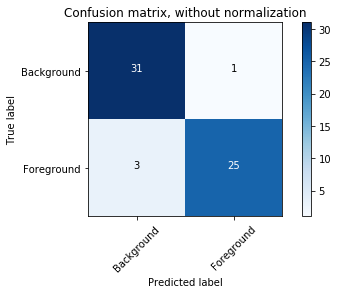

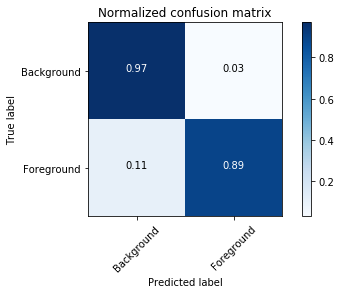

Decision Tree 10
Confusion matrix, without normalization
[[31  1]
 [ 3 25]]
Normalized confusion matrix
[[0.97 0.03]
 [0.11 0.89]]


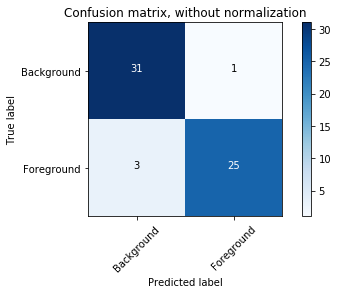

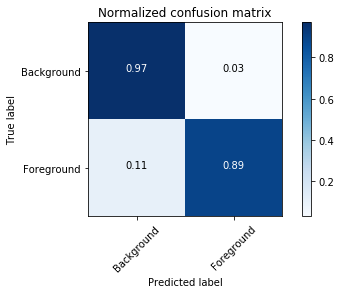

Random Forest
Confusion matrix, without normalization
[[32  0]
 [ 3 25]]
Normalized confusion matrix
[[1.   0.  ]
 [0.11 0.89]]


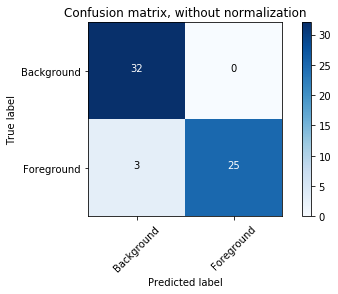

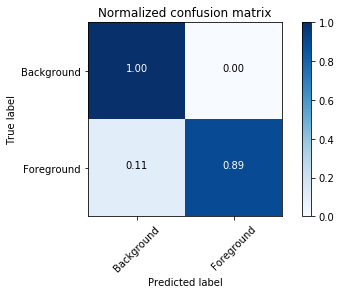

In [104]:


h = .02  # step size in the mesh

names = [
        #"Nearest Neighbors", 
        # "Linear SVM", 
         #"RBF SVM", 
         #"Gaussian Process",
         "Decision Tree  5",
         "Decision Tree 2",
         "Decision Tree 10",
         "Random Forest"
         #"Neural Net",
         #"AdaBoost"
         #"Naive Bayes", 
         #"QDA"
        ]

classifiers = [
    #KNeighborsClassifier(2),
    #SVC(kernel="linear", C=0.025),
    #SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    DecisionTreeClassifier(max_depth=2),
    DecisionTreeClassifier(max_depth=30, max_features=6),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
    #MLPClassifier(alpha=1),
    #AdaBoostClassifier()
    #GaussianNB(),
    #QuadraticDiscriminantAnalysis()
    ]

rng = np.random.RandomState(2)

# preprocess dataset, split into training and test part
X = data[:,:-1] # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
y = data[:,-1]

#X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.3, random_state=7)

for name, clf in zip(names, classifiers):
    print(name)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    #score = clf.score(X_test, y_test)
    #print(score)

    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=["Background", "Foreground"],
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=["Background", "Foreground"], normalize=True,
                          title='Normalized confusion matrix')

    plt.show()
    
#save_fig = set_save
#fig_format = 'png'
#fig_dpi =300

#plt.tight_layout()
#fig_name = 'img-output/classification-on-balanced.{}'.format(fig_format)
#print(fig_name)
#if(save_fig): 
#    figure.savefig(fig_name, bbox_inches='tight', format=fig_format, dpi=fig_dpi)
#    plt.close(figure)

Random Forest
             precision    recall  f1-score   support

 Background       1.00      0.99      0.99    976979
 Foreground       0.26      0.89      0.40      5292

avg / total       1.00      0.99      0.99    982271

Accuracy: 0.985830794149476
Confusion matrix, without normalization
[[963641  13338]
 [   580   4712]]
Normalized confusion matrix
[[0.99 0.01]
 [0.11 0.89]]


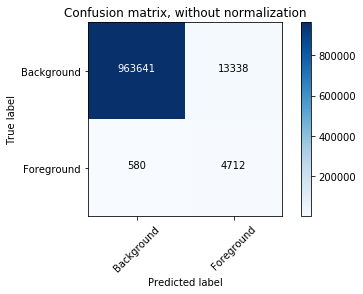

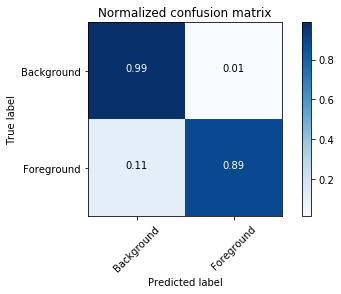

In [106]:
input_filename = "../../input/pre-proc/L6_2_982271.csv"

for name, clf in zip(names, classifiers):
    if (name != 'Random Forest'): continue
    
    big_y_test =[]
    big_y_pred = []
    
    sample_count = 0
    sample_count_max = -1
    
    print(name)
    with open(input_filename) as infile:
        for line in infile:

            l = np.fromstring(line, dtype=float, sep=',')

            X_sample=np.array(l[:-1])
            y_sample=l[-1]
            
            big_y_test.append(y_sample)
            big_y_pred.append(clf.predict(np.array([X_sample]))[0]) # Get the element
            
            sample_count += 1
                              
            if (sample_count == sample_count_max):
                break
        
    

    printCLassificationReport(big_y_test, big_y_pred, ["Background", "Foreground"])
    print("Accuracy: {}".format(accuracy_score(big_y_test, big_y_pred)))
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(big_y_test, big_y_pred)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=["Background", "Foreground"],
                          title='Confusion matrix, without normalization')
    
    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=["Background", "Foreground"], normalize=True,
                          title='Normalized confusion matrix')

    plt.show()
        

In [107]:
print("Accuracy: {}".format(accuracy_score(big_y_test, big_y_pred)))

Accuracy: 0.985830794149476


In [83]:
976979/982271

0.9946124847419907